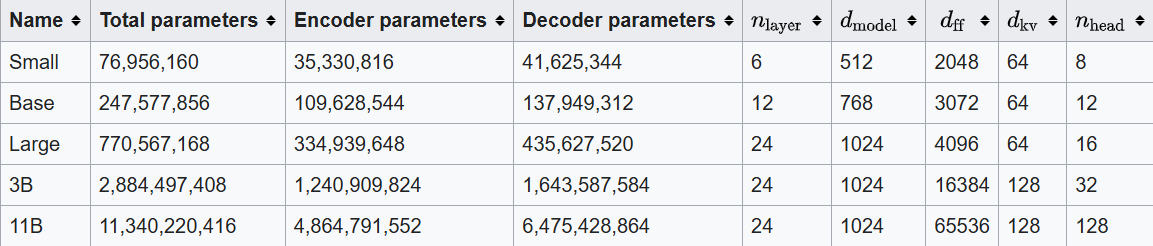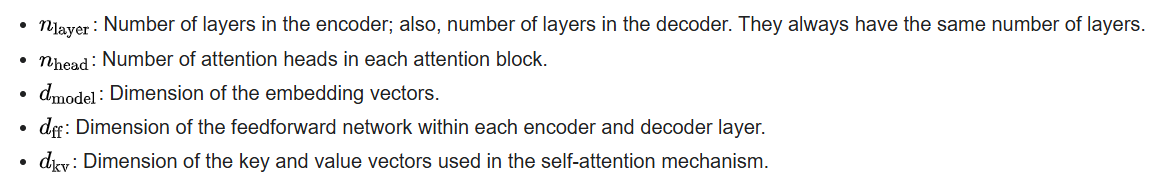

# Text Summarizer

## Importing Libraries

In [2]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import pickle
import os

## Loading model and tokenizer

In [3]:
def load_model_and_tokenizer(model_name='t5-small'):
  model = T5ForConditionalGeneration.from_pretrained(model_name)
  tokenizer = T5Tokenizer.from_pretrained(model_name)

  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  return model.to(device).eval(), tokenizer

In [18]:
def summerize_text(model, tokenizer, text, max_length=128, min_length=64,
                   device="cuda" if torch.cuda.is_available() else "cpu"):

  text = "summerize:"+ text
  encoding = tokenizer(
      text,
      max_length = max_length,
      padding = 'max_length',
      truncation = True,
      return_tensors = 'pt'
  )

  input_ids = encoding['input_ids'].to(device)
  attention_mask = encoding['attention_mask'].to(device)

  generated_ids = model.generate(
      input_ids = input_ids,
      attention_mask = attention_mask,
      max_length = max_length,
      min_length = min_length,
      num_beams = 4,
      length_penalty = 1.0,
      early_stopping = True,
  )

  return tokenizer.decode(generated_ids[0], skip_special_tokens=True)


In [20]:
def main():
  model, tokenizer = load_model_and_tokenizer()
  input_text = input("Enter text to be summarized: ").strip()
  summary = summerize_text(model, tokenizer, input_text)
  print("Length of input: ",len(input_text.split()))
  print("\nSummary: ",summary)
  print("\nLength of summary: ",len(summary.split()))

if __name__ == "__main__":
  main()

Enter text to be summarized: India, a land of staggering diversity and ancient heritage, sprawls across the South Asian subcontinent, bordered by the Arabian Sea, Bay of Bengal, and the Indian Ocean. Its geography is a tapestry of extremes: the towering Himalayas in the north, the fertile Gangetic plains, the arid Thar Desert in the west, and lush coastal regions fringed by palm trees. The country’s 3.3 million square kilometers house over 1.4 billion people, making it the world’s most populous nation and a vibrant mosaic of cultures, languages, and traditions.  India’s history stretches back millennia, rooted in the Indus Valley Civilization, one of the world’s earliest urban societies, flourishing around 2500 BCE. Archaeological sites like Harappa and Mohenjo-Daro reveal sophisticated urban planning and trade networks. Over centuries, India became a cradle for major religions—Hinduism, Buddhism, Jainism, and Sikhism—while also embracing Islam, Christianity, Zoroastrianism, and others